In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import json

This code takes a csv of observed points and a csv make from a .shp shapefiles. 
it will plot them together and make a json file compatible with Plouf C code. 

In [4]:
def plot_line_and_polygon(shape: pd.DataFrame, points: pd.DataFrame = None) -> None:
    fig, ax = plt.subplots(figsize=(9,13))

    if points is not None:
        ax.plot(points.Easting,points.Northing,color='red',markersize=3,label='Observed Data')
        
    ax.plot(shape.Easting,shape.Northing,linestyle='dashed',color='black',label='Magnetic Body')
    ax.scatter(shape.Easting,shape.Northing,color='blue',label='Verticies')

    ax.legend(loc='upper right')
    plt.savefig('./shape.png')

In [5]:
def save_json(all_shapes, filename="./data/shape_data.json"):
    """Save the coordinates of multiple shapes to a JSON file."""
    json_data = {"shapes": all_shapes}
    
    # Serializing json
    json_object = json.dumps(json_data, indent=4)
    
    # Writing to a JSON file
    with open(filename, "w") as outfile:
        outfile.write(json_object)

    print('json saved to: {}\n'.format(outfile.name))

In [15]:
pts = pd.read_csv("/home/jovyan/Cproject/test/example_line.txt",usecols=[0,1,2],header=None,sep='[\\s,]',names=['Easting','Northing','Mag'],engine='python')
print('\nFile head: \n',pts.head())


File head: 
          Easting      Northing       Mag
0  535843.289625  4.069294e+06 -0.220017
1  535843.223230  4.069297e+06  0.060021
2  535843.156118  4.069299e+06  0.439363
3  535843.088408  4.069301e+06  0.419423
4  535843.021542  4.069303e+06  0.199467


In [12]:
shape = pd.read_csv('/home/jovyan/Cproject/data/shape_data/qgis_cone1_shape.csv',skiprows=1,usecols=[0,1],sep='[\\s,]',names=['Easting','Northing'],engine='python')
print('\nFile head: \n',shape.head())


File head: 
          Easting      Northing
0  546367.791756  4.055248e+06
1  546458.761584  4.055182e+06
2  546476.955550  4.055036e+06
3  546404.179688  4.054757e+06
4  546476.955550  4.054703e+06


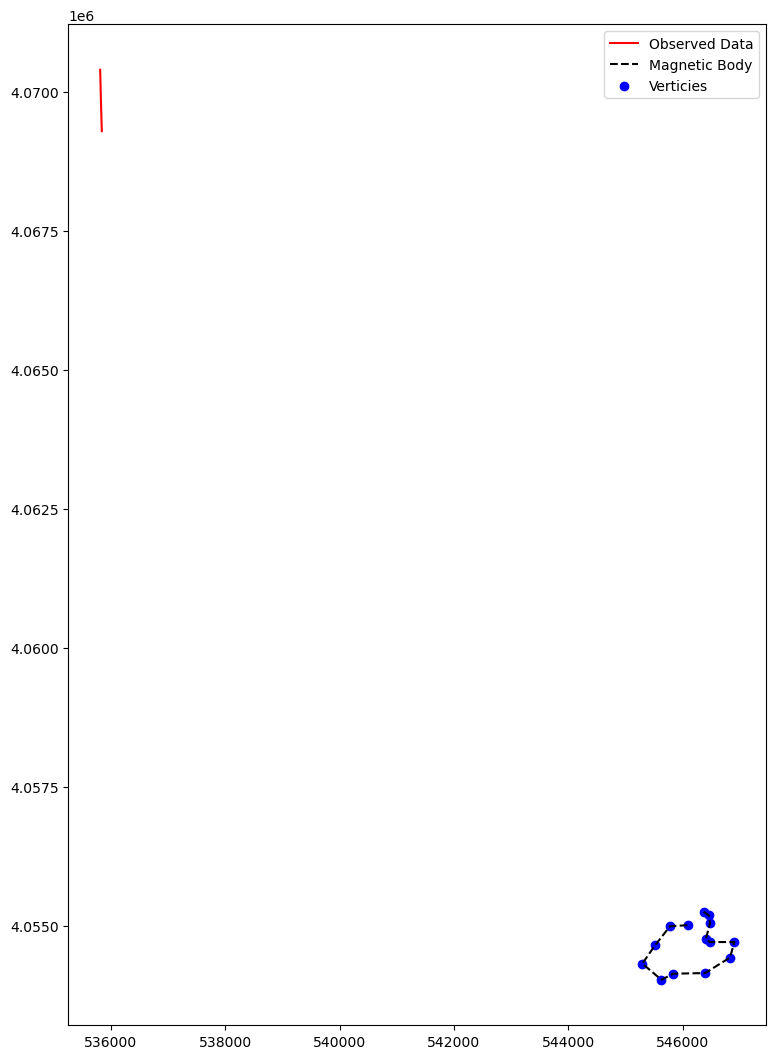

In [13]:
plot_line_and_polygon(shape=shape,points=pts)

In [9]:
all_shapes = []  # List to hold all shape data

#assuming single shape
shape_data = {
    'name': f"shape 1",
    'x': shape.Easting.to_list(),
    'y': shape.Northing.to_list(),
    'magnetic_inclination': -67,
    'magnetic_declination': 177,
    'magnetic_intensity': 1,
    'top': 10,
    'bottom': 50
}

all_shapes.append(shape_data)

# Save all shapes data to JSON
# save_json(all_shapes,filename='/home/jovyan/Cproject/data/shape_data/cone1_shape.json')

In [10]:
all_shapes[0]

{'name': 'shape 1',
 'x': [546367.791756466,
  546458.761584052,
  546476.955549569,
  546404.1796875,
  546476.955549569,
  546901.481411638,
  546828.705549569,
  546392.050377155,
  545834.102101293,
  545627.903825431,
  545294.347790948,
  545518.740032328,
  545779.520204742,
  546100.946928879],
 'y': [4055248.32637392,
  4055181.61516703,
  4055036.06344289,
  4054757.08930496,
  4054702.50740841,
  4054702.50740841,
  4054423.53327047,
  4054144.55913254,
  4054132.4298222,
  4054023.2660291,
  4054314.36947737,
  4054647.92551185,
  4054987.54620151,
  4055005.74016703],
 'magnetic_inclination': -67,
 'magnetic_declination': 177,
 'magnetic_intensity': 1,
 'top': 10,
 'bottom': 50}